In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

data_btc=pd.read_csv("bitcoin_historical_data_cleaned.csv")
data_gold=pd.read_csv("gold_historical_data_cleaned.csv")
data_sp500=pd.read_csv("sp500_historical_data_cleaned.csv")

In [10]:
# Convertir les dates en format datetime
data_btc['Date'] = pd.to_datetime(data_btc['Date'])
data_sp500['Date'] = pd.to_datetime(data_sp500['Date'])
data_gold['Date'] = pd.to_datetime(data_gold['Date'])

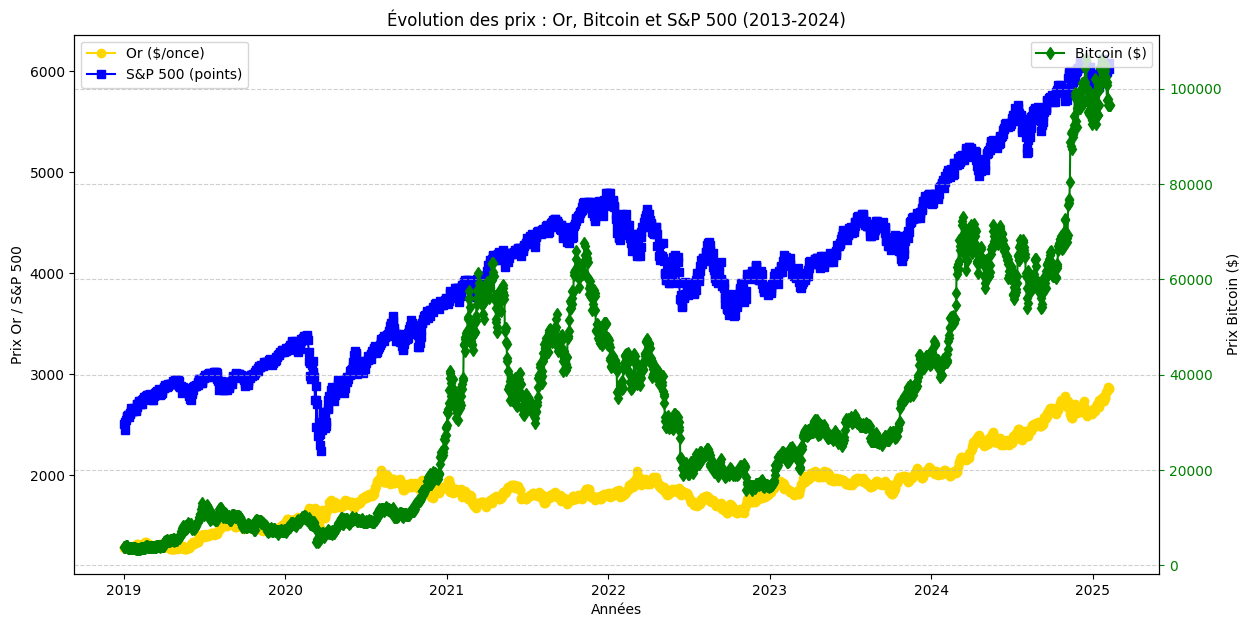

In [3]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Tracer l'or et le S&P 500 sur l'axe principal
ax1.plot(data_gold['Date'], data_gold['Close'], 'o-', color='gold', label="Or ($/once)")
ax1.plot(data_sp500['Date'], data_sp500['Close'], 's-', color='blue', label="S&P 500 (points)")
ax1.set_xlabel("Années")
ax1.set_ylabel("Prix Or / S&P 500")
ax1.tick_params(axis='y')

# Ajouter un second axe Y pour le Bitcoin (grande variation de prix)
ax2 = ax1.twinx()
ax2.plot(data_btc['Date'], data_btc['Close'], 'd-', color='green', label="Bitcoin ($)")
ax2.set_ylabel("Prix Bitcoin ($)")
ax2.tick_params(axis='y', colors='green')

# Ajouter les légendes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Ajouter un titre
plt.title("Évolution des prix : Or, Bitcoin et S&P 500 (2013-2024)")
plt.grid(True, linestyle="--", alpha=0.6)

# Affichage du graphique
plt.show()


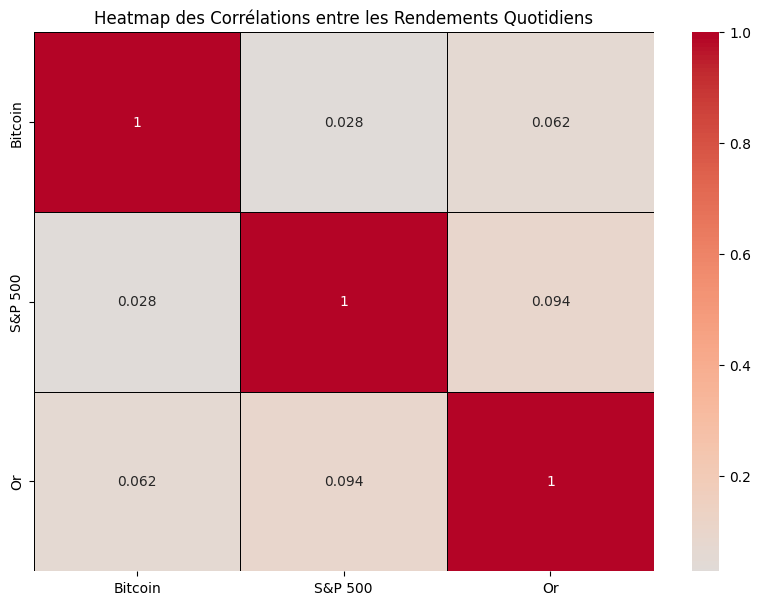

In [4]:

# Calcul des rendements quotidiens
data_btc['Return'] = data_btc['Close'].pct_change()
data_sp500['Return'] = data_sp500['Close'].pct_change()
data_gold['Return'] = data_gold['Close'].pct_change()

# Concaténer les rendements quotidiens dans un seul DataFrame
returns = pd.DataFrame({
    'Bitcoin': data_btc['Return'],
    'S&P 500': data_sp500['Return'],
    'Or': data_gold['Return']
}).dropna()

# Calculer la matrice de corrélation
corr_matrix = returns.corr()

# Créer une heatmap pour visualiser les corrélations
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Heatmap des Corrélations entre les Rendements Quotidiens')
plt.show()




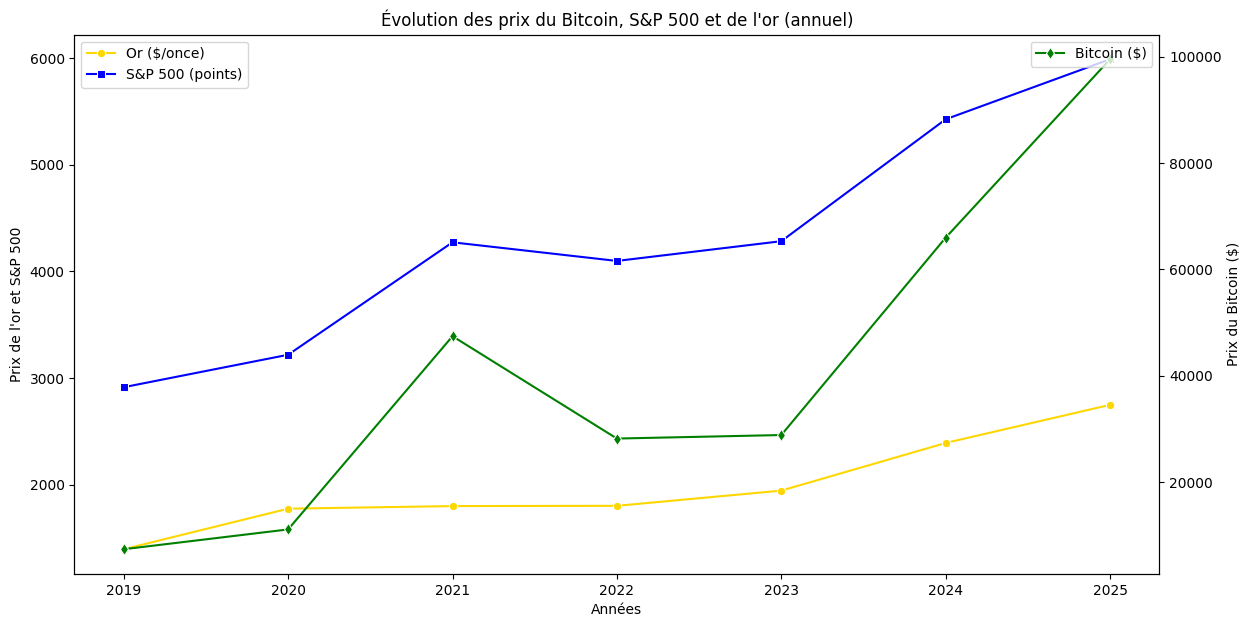

In [5]:
# Extraire l'année pour chaque enregistrement
data_btc['Année'] = data_btc['Date'].dt.year
data_sp500['Année'] = data_sp500['Date'].dt.year
data_gold['Année'] = data_gold['Date'].dt.year

# Agréger les données par année pour chaque actif
annual_btc = data_btc.groupby('Année')['Close'].mean().reset_index()
annual_sp500 = data_sp500.groupby('Année')['Close'].mean().reset_index()
annual_gold = data_gold.groupby('Année')['Close'].mean().reset_index()

# Renommer les colonnes pour correspondre aux noms de série
annual_btc.rename(columns={'Close': 'Bitcoin ($)'}, inplace=True)
annual_sp500.rename(columns={'Close': 'S&P 500 (points)'}, inplace=True)
annual_gold.rename(columns={'Close': 'Or ($/once)'}, inplace=True)

# Fusionner les données par année
merged_data = pd.merge(annual_btc, annual_sp500, on='Année')
merged_data = pd.merge(merged_data, annual_gold, on='Année')


# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Tracer l'or et le S&P 500 sur le premier axe
sns.lineplot(data=merged_data, x='Année', y='Or ($/once)', marker="o", label="Or ($/once)", ax=ax1, color="gold")
sns.lineplot(data=merged_data, x='Année', y='S&P 500 (points)', marker="s", label="S&P 500 (points)", ax=ax1, color="blue")

# Création du second axe pour le Bitcoin
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='Année', y='Bitcoin ($)', marker="d", label="Bitcoin ($)", ax=ax2, color="green")

# Ajout des labels et du titre
ax1.set_xlabel("Années")
ax1.set_ylabel("Prix de l'or et S&P 500")
ax2.set_ylabel("Prix du Bitcoin ($)")
ax1.set_title("Évolution des prix du Bitcoin, S&P 500 et de l'or (annuel)")

# Ajustement de la légende
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Affichage du graphique
plt.show()


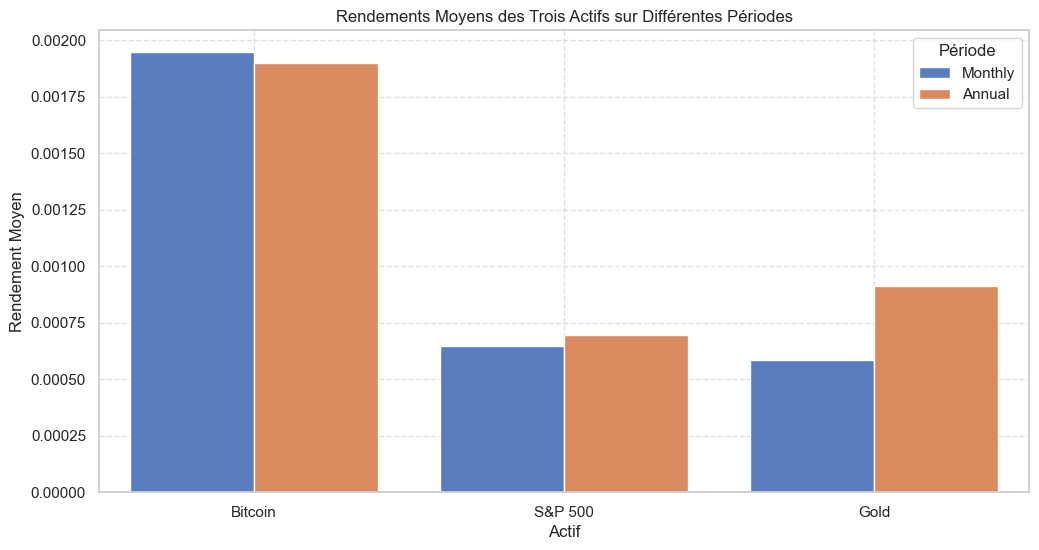

In [ ]:
# Calcul des rendements quotidiens
data_btc['Return'] = data_btc['Close'].pct_change()
data_sp500['Return'] = data_sp500['Close'].pct_change()
data_gold['Return'] = data_gold['Close'].pct_change()

# Calcul des rendements mensuels et annuels  #Quelques mis à jour
''' btc_monthly_return = data_btc.resample('M', on='Date')['Return'].mean()
sp500_monthly_return = data_sp500.resample('M', on='Date')['Return'].mean()
gold_monthly_return = data_gold.resample('M', on='Date')['Return'].mean()

btc_annual_return = data_btc.resample('Y', on='Date')['Return'].mean()
sp500_annual_return = data_sp500.resample('Y', on='Date')['Return'].mean()
gold_annual_return = data_gold.resample('Y', on='Date')['Return'].mean()  '''

btc_monthly_return = data_btc.resample('ME', on='Date')['Return'].mean()
sp500_monthly_return = data_sp500.resample('ME', on='Date')['Return'].mean()
gold_monthly_return = data_gold.resample('ME', on='Date')['Return'].mean()

btc_annual_return = data_btc.resample('YE', on='Date')['Return'].mean()
sp500_annual_return = data_sp500.resample('YE', on='Date')['Return'].mean()
gold_annual_return = data_gold.resample('YE', on='Date')['Return'].mean()



# Création d'un DataFrame pour les rendements moyens
data_to_plot = pd.DataFrame({
    'Period': ['Monthly'] * 3 + ['Annual'] * 3,
    'Asset': ['Bitcoin', 'S&P 500', 'Gold'] * 2,
    'Return': [
        btc_monthly_return.mean(), sp500_monthly_return.mean(), gold_monthly_return.mean(),
        btc_annual_return.mean(), sp500_annual_return.mean(), gold_annual_return.mean()
    ]
})


# Configuration du style des graphiques
sns.set(style="whitegrid")

# Graphique en barres pour les rendements moyens
plt.figure(figsize=(12, 6))
sns.barplot(x='Asset', y='Return', hue='Period', data=data_to_plot, palette="muted")
plt.title('Rendements Moyens des Trois Actifs sur Différentes Périodes')
plt.ylabel('Rendement Moyen')
plt.xlabel('Actif')
plt.legend(title='Période')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


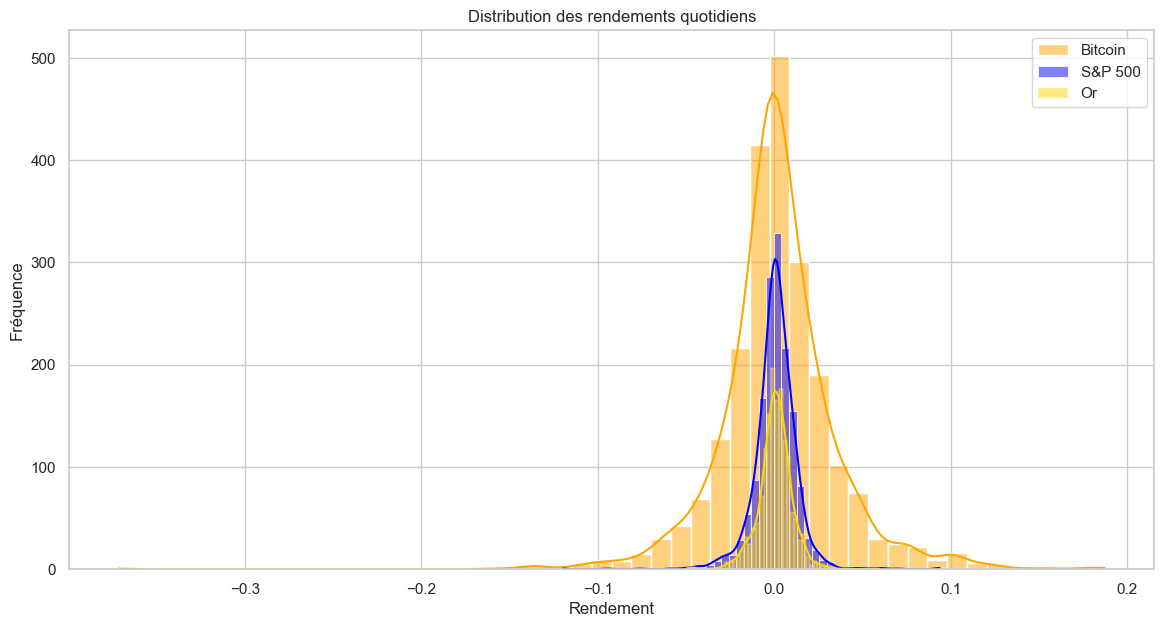

Volatilité quotidienne Bitcoin : 0.034
Volatilité quotidienne S&P 500 : 0.013
Volatilité quotidienne Or : 0.010


In [8]:
# Calcul des rendements quotidiens
data_btc['Return'] = data_btc['Close'].pct_change()
data_sp500['Return'] = data_sp500['Close'].pct_change()
data_gold['Return'] = data_gold['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.histplot(data_btc['Return'].dropna(), bins=50, kde=True, color='orange', label='Bitcoin')
sns.histplot(data_sp500['Return'].dropna(), bins=50, kde=True, color='blue', label='S&P 500')
sns.histplot(data_gold['Return'].dropna(), bins=50, kde=True, color='gold', label='Or')
plt.title('Distribution des rendements quotidiens')
plt.xlabel('Rendement')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()

# Calcul de la volatilité quotidienne
volatility_btc = data_btc['Return'].std()
volatility_sp500 = data_sp500['Return'].std()
volatility_gold = data_gold['Return'].std()

# Affichage de la volatilité
print(f"Volatilité quotidienne Bitcoin : {volatility_btc:.3f}")
print(f"Volatilité quotidienne S&P 500 : {volatility_sp500:.3f}")
print(f"Volatilité quotidienne Or : {volatility_gold:.3f}")
